## Assignment-07 First Step of using machine learning and models.

![](https://github.com/Computing-Intelligence/jupyters_and_slides/raw/master/entrance-test/images/kkb-ai.png)

In [3]:
fname = '/Users/gaominquan/Downloads/sqlResult_1558435 2.csv'

In [4]:
import pandas as pd

In [ ]:
content = pd.read_csv(fname, encoding='gb18030')

In [ ]:
content.head()

In [5]:
xinhua_news = content[content['source'] == '新华社']

In [6]:
len(xinhua_news) / len(content)

0.8778051801676133

### 任务描述

报社等相关的机构，往往会遇到一个问题，就是别人家的机构使用自己的文章但是并没有标明来源。 在本次任务中，我们将解决新华社的文章被抄袭引用的问题。

给定的数据集合中，存在一些新闻预料，该预料是来自新华社，但是其来源并不是新华社，请设计技巧学习模型解决该问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1566105348906&di=ee9a2de91207767364853d4decc6cca3&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_png%2FTicO2kbP6Ao5sCsSQDpehZiczLdC6hDCNvoicjcOCEKX2bLxBc9gVOw28zHyFibfIWq9ceRibP6HDTKReGkr6YyTfQQ%2F640%3Fwx_fmt%3Dpng)

### Step1: 数据分析

请在课程的GitHub中下载数据集，然后使用pandas进行读取。

In [6]:
# it‘s your time
fname = '1558435.csv'

In [2]:
import pandas as pd

In [7]:
content = pd.read_csv(fname,encoding='gb18030')

In [8]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [11]:
xinhua_news = content[content['source'] == '新华社']

In [12]:
len(xinhua_news) / len(content)

0.8778051801676133

### Step2: 数据预处理

将pandas中的数据，依据是否是新华社的文章，请改变成新的数据dataframe: <content, y>, 其中，content是文章内容，y是0或者1. 你可能要使用到pandas的dataframe操作。https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [11]:
type(content)

pandas.core.frame.DataFrame

In [13]:
len(content)

89611

In [14]:
# it's your time
content_1 = content.dropna(subset = ['content']) #剔除内容为空的行
len(content_1)

87054

In [21]:
content_1

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...
5,89612,张怡,中国证券报?中证网,受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",金融股一枝独秀 配置价值犹存,http://www.cs.com.cn/gppd/201706/t20170623_533...
6,89611,NaN,威锋网@http://www.feng.com/,虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""21""...",配骁龙660 全面屏鼻祖夏普新机酝酿中,http://www.cnbeta.com/articles/tech/623603.htm
7,89610,申玉彬 整理,中国证券报?中证网,沙漠雄鹰：震荡有利消化套牢筹码\r\n 周四开盘上证50在银行券商大蓝筹带动下一度涨近...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",博友早评：震荡有利消化套牢筹码,http://www.cs.com.cn/gppd/201706/t20170623_533...
8,89609,李杭_BJS4645,荆楚网-楚天都市报,（原标题：武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！）\r\n...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""1600""...",武汉千余警察出动 抓获808名俊男靓女全是诈骗犯,http://news.163.com/17/0614/14/CMT9N8G80001899...
9,89608,吴瞬,中国证券报?中证网,6月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",纳入MSCI指数 A股长期配置价值提升,http://www.cs.com.cn/gppd/201706/t20170623_533...


In [22]:
label = (content_1.source == '新华社').astype(int)
content = content_1.content

In [23]:
new = pd.DataFrame({'content':content, 'label':label})

In [39]:
new[:3]

,content,label
0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,0
1,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,0
2,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,0


In [36]:
Survived_freq = new.label.value_counts()
print(Survived_freq)

1    78661
0     8393
Name: label, dtype: int64


#正负样本不均衡，还没有好的解决办法

In [43]:
table = new.content.to_list()

In [50]:
table[:3],   len(table)

(['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n',
  '骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n',
  '此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n至于电池缩水，可能与刘作虎所说，一加手机5要做市面最轻薄大屏旗舰的设定有关。\r\n按照目前掌握的资料，一加手机5拥有5.5寸1080P三星AMOLED显示屏、6G/8GB RAM，64GB/128GB ROM，双1600万摄像头，备货量“惊喜”。\r\n根据京东泄露的信息，一加5起售价是xx99元，应该是在2799/2899/2999中的某个。\r\n'],
 87054)

In [56]:
from tqdm import tqdm
import re

In [51]:
import os
from pyltp import Segmentor, SentenceSplitter

In [52]:
model_path = 'C:\\Users\\672\\Desktop\\ltp_data_v3.4.0'
cws_model_path = os.path.join(model_path, 'cws.model')

In [53]:
segmentor = Segmentor()
segmentor.load(cws_model_path)

In [ ]:
words = segmentor.segment()

#利用pyltp来切词

In [57]:
table_cut = []
mask = []
for sentence in tqdm(table):
    if not isinstance(sentence, str):
        mask.append(False)
        continue
    mask.append(True)
    sentence = ''.join(re.findall(r'\w+', sentence))
    table_cut.append(' '.join(segmentor.segment(sentence)))
len(table_cut)

100%|██████████████████████████████████████████████████████████████████| 87054/87054 [05:57<00:00, 243.33it/s]


87054

In [58]:
table_cut[:3]

['此外 自 本周 6月 12日 起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验 版 内测 稳定 版 暂 不 受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统 优化 工作 有人 猜测 这 也 是 将 精力 主要 用 到 MIUI9 的 研发 之中 MIUI8 去年 5月 发布 距 今 已 有 一 年 有余 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方 消息',
 '骁龙 835 作为 唯一 通过 Windows10 桌面 平台 认证 的 ARM 处理器 高通 强调 不 会 因为 只 考虑 性能 而 去 屏蔽 掉 小 核心 相反 他们 正 联手 微软 找到 一 种 适合 桌面 平台 的 兼顾 性能 和 功耗 的 完美 方案 报道 称 微软 已经 拿 到 了 一些 新 的 源码 以便 Windows10 更 好 地 理解 biglittle 架构 资料 显示 骁龙 835 作为 一 款 集成 了 CPUGPU 基带 蓝牙 WiFi 的 SoC 比 传统 的 Wintel 方案 可以 节省 至少 30 的 PCB 空间 按 计划 今年 Q4 华硕 惠普 联想 将 首发 骁龙 835Win10 电脑 预计 均 是 二 合 一 形态 的 产品 当然 高通 骁龙 只 是 个 开始 未来 也许 还 能 见到 三星 Exynos 联发科 华为 麒麟 小米 澎湃 等 进入 Windows10 桌面 平台',
 '此前 的 一 加 3T 搭载 的 是 3400mAh 电池 DashCharge 快 充 规格 为 5V4A 至于 电池 缩水 可能 与 刘作虎 所 说 一 加 手机 5 要 做 市面 最 轻薄 大屏 旗舰 的 设定 有关 按照 目前 掌握 的 资料 一 加 手机 5 拥有 55 寸 1080P 三星 AMOLED 显示屏 6G8GBRAM64GB128GBROM 双 1600万 摄像头 备货量 惊喜 根据 京东 泄露 的 信息 一 加 5 起 售价 是 xx99 元 应该 是 在 279928992999 中 的 某个']

### Step3: 使用tfidf进行文本向量化

参考 https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 对

对文本进行向量化

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [172]:
vectorizer = TfidfVectorizer(max_features = 200)
X = vectorizer.fit_transform(table_cut)

In [173]:
X.shape

(87054, 200)

In [174]:
print(X[0])

  (0, 7)	0.23160336799054929
  (0, 63)	0.5784110549140488
  (0, 98)	0.29060469128701016
  (0, 66)	0.26779346767393697
  (0, 184)	0.20390222350541573
  (0, 156)	0.3140536236093098
  (0, 85)	0.23534501185704543
  (0, 21)	0.2721136454195156
  (0, 6)	0.15892418320115828
  (0, 42)	0.30341624854782995
  (0, 103)	0.26206655984830596


In [69]:
import numpy as np

In [176]:
y = new.label.values.astype(np.int)

In [177]:
y.shape

(87054,)

In [178]:
y

array([0, 0, 0, ..., 1, 1, 1])

### Step4: 参考scikit-learning的方法，构建你的第一个机器学习模型

+ 按照课程讲解的内容，把数据集分割为 traning_data, validation_data, test_data. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [62]:
from sklearn.model_selection import train_test_split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

+ 参照scikit learning的示例，从构建你的第一个KNN机器学习模型。

### Step5: 在traning_data, validation_data, test_data 上观察其相关metric: recall, precision, f1等， 并解释其含义. 

In [9]:
# it's your time

In [79]:
from sklearn.linear_model import LogisticRegression

In [180]:
clf = LogisticRegression(solver='saga').fit(X_train, y_train)

### Step6: 使用 test_data 对其进行新数据的判断, 你有没

In [10]:
# it's your time

In [181]:
clf.score(X_test, y_test)

0.9772179040471723

In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [182]:
y_pred = clf.predict(X_test)
recall_score(y_test, y_pred)

0.9926243058793608

In [183]:
f1_score(y_train, clf.predict(X_train))

0.988022113022113

 recall：召回率是针对我们原来的样本而言的，它表示的是样本中的正例有多少被预测正确了
 
 precision： 准确率就是预测对的样本数占样本总数的比例 
 
 f1：F1-score 是基于召回率和精确率计算的：F1score=2∗Precision∗Recall/(Precision+Recall)

### Step7: 调整不同的参数，观察变化

In [91]:
# it's your time
vectorizer = TfidfVectorizer(max_features = 300)
X = vectorizer.fit_transform(table_cut)

In [92]:
X.shape

(87054, 300)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

In [94]:
clf = LogisticRegression(solver='saga').fit(X_train, y_train)

In [95]:
clf.score(X_test, y_test)

0.9763755408354712

In [96]:
y_pred = clf.predict(table)
recall_score(y_test, y_pred)

0.9931753634860752

In [97]:
f1_score(y_train, clf.predict(X_train))

0.9877158304224996

### Step8: 不断改变参数，直到性能达到“某个”点。问：“某个”怎么定义？

In [103]:
from sklearn.linear_model import LogisticRegressionCV,LinearRegression

In [107]:
estimator=[
    
    ('clf',LogisticRegressionCV(multi_class='ovr',fit_intercept=True, Cs=np.logspace(-2, 2, 20), cv=2, penalty='l2', solver='lbfgs', tol=0.01))
]

In [112]:
# it's your time
lr = LogisticRegression(fit_intercept=True, penalty='l2', solver='lbfgs', tol=0.01, multi_class='multinomial')
#solver：‘newton-cg’,'lbfgs','liblinear','sag'  default:liblinear
#'sag'=mini-batch
#'multi_clss':
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False)

In [124]:
from sklearn import metrics

In [127]:
from sklearn.preprocessing import label_binarize

In [130]:
### 6. 模型效果输出
## 将正确的数据转换为矩阵形式
y_test_hot = label_binarize(y_test,classes=(0,1))
## 得到预测的损失值
lr_y_score = lr.decision_function(X_test)
## 计算roc的值
lr_fpr, lr_tpr, lr_threasholds = metrics.roc_curve(y_test_hot.ravel(),lr_y_score.ravel())
#threasholds阈值
## 计算auc的值
lr_auc = metrics.auc(lr_fpr, lr_tpr)
print ("Logistic算法R值：", lr.score(X_train, y_train))
print ("Logistic算法AUC值：", lr_auc)
### 7. 模型预测
lr_y_predict = lr.predict(X_test)

Logistic算法R值： 0.9820798529628961
Logistic算法AUC值： 0.9953638364644676


In [137]:
import matplotlib as mpl
import warnings
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

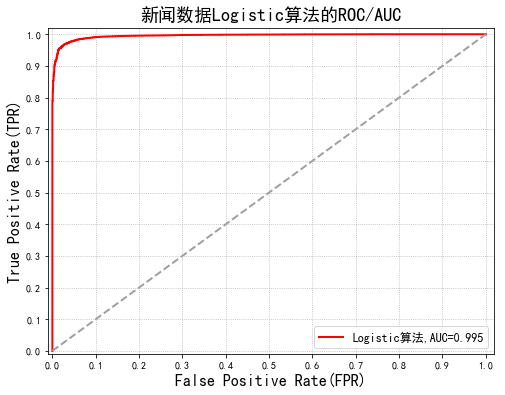

In [139]:
## 画图1：ROC曲线画图
plt.figure(figsize=(8, 6), facecolor='w')
plt.plot(lr_fpr,lr_tpr,c='r',lw=2,label=u'Logistic算法,AUC=%.3f' % lr_auc)
plt.plot((0,1),(0,1),c='#a0a0a0',lw=2,ls='--')
plt.xlim(-0.01, 1.02)#设置X轴的最大和最小值
plt.ylim(-0.01, 1.02)#设置y轴的最大和最小值
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate(FPR)', fontsize=16)
plt.ylabel('True Positive Rate(TPR)', fontsize=16)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'新闻数据Logistic算法的ROC/AUC', fontsize=18)
plt.show()

### Step9: 找出所以预测为 1， 但是实际为 0 的文章。 作为抄袭的候选者。

In [186]:
len(y_pred)

(87054, 26117)

In [189]:
y_pred = clf.predict(X)
y_pred.shape,y.shape

((87054,), (87054,))

In [190]:
# it's your time
new['y'] = y
new['y_pred'] = y_pred

In [195]:
new.head(10)

,content,label,y,y_pred
0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,0,0,0
1,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,0,0,0
2,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,0,0,0
3,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,1,1,1
4,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,0,0,0
5,受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金...,0,0,0
6,虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是...,0,0,0
7,沙漠雄鹰：震荡有利消化套牢筹码\r\n 周四开盘上证50在银行券商大蓝筹带动下一度涨近...,0,0,0
8,（原标题：武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！）\r\n...,0,0,0
9,6月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22...,0,0,0


In [196]:
fake_news = new[(new.y == 0) & (new.y_pred == 1)]
len(fake_news)
#虚假新闻1366篇

1366

### Step10： 总结该过程，什么是数据思维？什么是机器学习思维？

数据思维就是把日常碰到的问题，转化成数据，然后根据数据进行建模，最后得出结果，根据结果对商业决策进行数据支持。
机器学习思维也一样，就是把一个普通日常的问题抽象成机器学习场景，利用机器学习方法进行建模，最终得出结果支撑业务。

### (Optional)使用第4课讲解的 edit distance，在涉嫌抄袭的文章中，找到其重复的文字与被修改过的文字。 

### Step11: 利用第8课讲述的新模型，进行操作，感受其中不同的参数、模型对性能的影响。

本来打算用网格搜索的，后来电脑性能不足就放弃了

In [146]:
from sklearn.ensemble import AdaBoostClassifier#adaboost引入方法
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [148]:
#构建adaboost模型
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),#基学习器是决策树
                         algorithm="SAMME.R",#可以不写
                         n_estimators=200)
#gbd=GradientBoostingClassifier()
#数据量大的时候，可以增加内部分类器的树深度，也可以不限制树深
#max_depth树深，数据量大的时候，一般范围在10——100之间
#数据量小的时候，一般可以设置树深度较小，或者n_estimators较小
#n_estimators 迭代次数或者最大弱分类器数：200次
#base_estimator：DecisionTreeClassifier 选择弱分类器，默认为CART树
#algorithm：SAMME 和SAMME.R 。运算规则，后者是优化算法，以概率调整权重，迭代速度快，
#需要能计算概率的分类器支持
#learning_rate：0<v<=1，默认为1，正则项 衰减指数
#loss：linear、‘square’exponential’。误差计算公式：一般用linear足够
bdt.fit(X_train, y_train)
#gbd.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [161]:
### 6. 模型效果输出
## 将正确的数据转换为矩阵形式
y_test_hot = label_binarize(y_test,classes=(0,1))
## 得到预测的损失值
bdt_y_score = bdt.decision_function(X_test)
## 计算roc的值
bdt_fpr, bdt_tpr, bdt_threasholds = metrics.roc_curve(y_test_hot.ravel(),bdt_y_score.ravel())
#threasholds阈值
## 计算auc的值
bdt_auc = metrics.auc(bdt_fpr, bdt_tpr)
print ("AdaBoost算法R值：", bdt.score(X_train, y_train))
print ("AdaBoost算法AUC值：", bdt_auc)

AdaBoost算法R值： 0.9992451220112575
AdaBoost算法AUC值： 0.9976983888772485
